
![awesome](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTNs-DFos-cOiT0uqFtGIw4Hn7gWPPYPH5iiYd9JgnF&s)


# Determining the Market Segment For Microsoft in the Movie Industry

---


**Author** : [Matthew Karani](mailto:mkmkarani@gmail.com)



## Project Overview

---

This project aims to explore the opportunities of the well-known tech giant, Microsoft , claiming a stake in the lucrative movie industry. This project will use datasets from box office, tmdb and the numbers databases , to analyse the trends in the movie industry to determine the best course of action that Microsoft should take in order to make a big entry into the movie industry as it is fitting for a company of its stature.


### Business Problem

---

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

# Research Questions

<hr>

1. Which movie studio should microsoft patner with , learn from and leverage its association with in order to get maximum return on investment?
<br>
####  the columns required

2.  What Genre of movies should Microsoft create in order to capture a niche in the market for maximum return on investment. 
###### the data sources  required - TR
##### the columns required 
<br>

3. What length of movies would microsoft develop to curve a niche for themselves in the movie industy market in order to get large profits?
#### the data sources  required TN
#### the columns required



# Import Statements

In [175]:
import ast

from io import StringIO
import calendar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gzip
from IPython.display import display
import requestScript
import scripts



%matplotlib inline

# Step 1 : Data Extraction and Cleaning

## Loading the Datasets

In [148]:
# Set display format for float 
pd.set_option('display.float_format', '{:.2f}'.format)

In [149]:
# Load and display the Box Office Dataset
bom_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
display(bom_df.head())
display(bom_df.info())

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.00,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.00,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.00,664300000,2010
3,Inception,WB,292600000.00,535700000,2010
4,Shrek Forever After,P/DW,238700000.00,513900000,2010


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


None

In [150]:
# Load and display the TMDB Dataset
tmdb_df = pd.read_csv('zippedData/tmdb.movies.csv.gz')
display(tmdb_df)
display(tmdb_df.info())

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.53,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.70,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.73,2010-03-26,How to Train Your Dragon,7.70,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.52,2010-05-07,Iron Man 2,6.80,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.00,1995-11-22,Toy Story,7.90,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.92,2010-07-16,Inception,8.30,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.60,2018-10-13,Laboratory Conditions,0.00,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.60,2018-05-01,_EXHIBIT_84xxx_,0.00,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.60,2018-10-01,The Last One,0.00,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.60,2018-06-22,Trailer Made,0.00,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


None

In [151]:
# Load and Extract the Numbers Dataset
tn_df = pd.read_csv( 'zippedData/tn.movie_budgets.csv.gz')
display(tn_df)
display(tn_df.info())

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


None

## Rename movie_title column in all three datasets to prepare for merging

In [152]:
# Box Office Dataset
bom_df.rename(columns={'title': 'movie_title'}, inplace=True)

# TMDB Dataset
tmdb_df.rename(columns={'original_title': 'movie_title'}, inplace=True)

#The Numbers Dataset
tn_df.rename(columns={'movie':'movie_title'}, inplace=True)


### Merge the Three Datasets 

In [153]:
# Merge TMDB Dataframe and Box Office Dataframe
initial_merge = pd.merge(bom_df, tmdb_df, on = 'movie_title',how = 'inner')

#inital merge and the numbers df
final_merge = pd.merge(initial_merge, tn_df, on='movie_title',how = 'inner')

# merged_dataframe
merged_movie_df = final_merge

#display the dataframe
display(merged_movie_df)
display(merged_movie_df.info())
display(merged_movie_df.describe())

,movie_title,studio,domestic_gross_x,foreign_gross,year,Unnamed: 0,genre_ids,id_x,original_language,popularity,release_date_x,title,vote_average,vote_count,id_y,release_date_y,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.00,652000000,2010,7,"[16, 10751, 35]",10193,en,24.45,2010-06-17,Toy Story 3,7.70,8340,47,"Jun 18, 2010","$200,000,000","$415,004,880","$1,068,879,522"
1,Inception,WB,292600000.00,535700000,2010,4,"[28, 878, 12]",27205,en,27.92,2010-07-16,Inception,8.30,22186,38,"Jul 16, 2010","$160,000,000","$292,576,195","$835,524,642"
2,Shrek Forever After,P/DW,238700000.00,513900000,2010,38,"[35, 12, 14, 16, 10751]",10192,en,15.04,2010-05-16,Shrek Forever After,6.10,3843,27,"May 21, 2010","$165,000,000","$238,736,787","$756,244,673"
3,The Twilight Saga: Eclipse,Sum.,300500000.00,398000000,2010,15,"[12, 14, 18, 10749]",24021,en,20.34,2010-06-23,The Twilight Saga: Eclipse,6.00,4909,53,"Jun 30, 2010","$68,000,000","$300,531,751","$706,102,828"
4,Iron Man 2,Par.,312400000.00,311500000,2010,2,"[12, 28, 878]",10138,en,28.52,2010-05-07,Iron Man 2,6.80,12368,15,"May 7, 2010","$170,000,000","$312,433,331","$621,156,389"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1360,Bilal: A New Breed of Hero,VE,491000.00,1700000,2018,25148,"[28, 12, 16]",332718,en,2.71,2018-02-02,Bilal: A New Breed of Hero,6.80,54,100,"Feb 2, 2018","$30,000,000","$490,973","$648,599"
1361,Mandy,RLJ,1200000.00,NaN,2018,20499,[18],499658,en,0.60,2016-01-24,Mandy,3.50,2,71,"Sep 14, 2018","$6,000,000","$1,214,525","$1,427,656"
1362,Mandy,RLJ,1200000.00,NaN,2018,23952,"[28, 53, 27, 14, 9648]",460885,en,16.24,2018-09-13,Mandy,6.20,618,71,"Sep 14, 2018","$6,000,000","$1,214,525","$1,427,656"
1363,Lean on Pete,A24,1200000.00,NaN,2018,20908,"[18, 12]",407890,en,9.31,2018-04-06,Lean on Pete,6.90,133,13,"Apr 6, 2018","$8,000,000","$1,163,056","$2,455,027"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1365 entries, 0 to 1364
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_title        1365 non-null   object 
 1   studio             1364 non-null   object 
 2   domestic_gross_x   1364 non-null   float64
 3   foreign_gross      1182 non-null   object 
 4   year               1365 non-null   int64  
 5   Unnamed: 0         1365 non-null   int64  
 6   genre_ids          1365 non-null   object 
 7   id_x               1365 non-null   int64  
 8   original_language  1365 non-null   object 
 9   popularity         1365 non-null   float64
 10  release_date_x     1365 non-null   object 
 11  title              1365 non-null   object 
 12  vote_average       1365 non-null   float64
 13  vote_count         1365 non-null   int64  
 14  id_y               1365 non-null   int64  
 15  release_date_y     1365 non-null   object 
 16  production_budget  1365 

None

,domestic_gross_x,year,Unnamed: 0,id_x,popularity,vote_average,vote_count,id_y
count,1364.00,1365.00,1365.00,1365.00,1365.00,1365.00,1365.00,1365.00
mean,63822457.25,2013.82,11145.21,194498.33,13.23,6.40,2324.30,51.10
std,88922942.96,2.51,7712.17,137458.75,8.01,0.92,2944.14,28.26
min,800.00,2010.00,1.00,1771.00,0.60,0.00,1.00,1.00
25%,8250000.00,2012.00,4222.00,62764.00,8.56,5.90,438.00,27.00
50%,35100000.00,2014.00,11095.00,171274.00,11.57,6.40,1241.00,51.00
75%,78175000.00,2016.00,17524.00,310593.00,16.20,7.00,2973.00,74.00
max,700100000.00,2018.00,26506.00,561861.00,80.77,10.00,22186.00,100.00


In [154]:
# Clean the data
# Get rid of commas in the foreign_gross column
bom_df['foreign_gross'] = bom_df['foreign_gross'].str.replace(',','')

# Convert foreign gross to float
bom_df['foreign_gross'] = bom_df['foreign_gross'].astype(float)
bom_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movie_title     3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [155]:
# Drop the year column
bom_df.drop(columns='year', inplace=True)
display(bom_df)

,movie_title,studio,domestic_gross,foreign_gross
0,Toy Story 3,BV,415000000.00,652000000.00
1,Alice in Wonderland (2010),BV,334200000.00,691300000.00
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.00,664300000.00
3,Inception,WB,292600000.00,535700000.00
4,Shrek Forever After,P/DW,238700000.00,513900000.00
...,...,...,...,...
3382,The Quake,Magn.,6200.00,NaN
3383,Edward II (2018 re-release),FM,4800.00,NaN
3384,El Pacto,Sony,2500.00,NaN
3385,The Swan,Synergetic,2400.00,NaN


## Data Cleaning

In [156]:
# Drop duplicate rows and reasign
merged_movie_df.drop_duplicates(keep='first', inplace=True)

# Eliminate NaN values
# Check to see how many null values are present in the dataframe
display(merged_movie_df.isna().sum())

# Drop the NaN values
merged_movie_df.dropna(inplace=True)

# Display cleaned df
display(merged_movie_df)

movie_title            0
studio                 1
domestic_gross_x       1
foreign_gross        183
year                   0
Unnamed: 0             0
genre_ids              0
id_x                   0
original_language      0
popularity             0
release_date_x         0
title                  0
vote_average           0
vote_count             0
id_y                   0
release_date_y         0
production_budget      0
domestic_gross_y       0
worldwide_gross        0
dtype: int64

,movie_title,studio,domestic_gross_x,foreign_gross,year,Unnamed: 0,genre_ids,id_x,original_language,popularity,release_date_x,title,vote_average,vote_count,id_y,release_date_y,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.00,652000000,2010,7,"[16, 10751, 35]",10193,en,24.45,2010-06-17,Toy Story 3,7.70,8340,47,"Jun 18, 2010","$200,000,000","$415,004,880","$1,068,879,522"
1,Inception,WB,292600000.00,535700000,2010,4,"[28, 878, 12]",27205,en,27.92,2010-07-16,Inception,8.30,22186,38,"Jul 16, 2010","$160,000,000","$292,576,195","$835,524,642"
2,Shrek Forever After,P/DW,238700000.00,513900000,2010,38,"[35, 12, 14, 16, 10751]",10192,en,15.04,2010-05-16,Shrek Forever After,6.10,3843,27,"May 21, 2010","$165,000,000","$238,736,787","$756,244,673"
3,The Twilight Saga: Eclipse,Sum.,300500000.00,398000000,2010,15,"[12, 14, 18, 10749]",24021,en,20.34,2010-06-23,The Twilight Saga: Eclipse,6.00,4909,53,"Jun 30, 2010","$68,000,000","$300,531,751","$706,102,828"
4,Iron Man 2,Par.,312400000.00,311500000,2010,2,"[12, 28, 878]",10138,en,28.52,2010-05-07,Iron Man 2,6.80,12368,15,"May 7, 2010","$170,000,000","$312,433,331","$621,156,389"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353,Hotel Artemis,Global Road,6700000.00,6000000,2018,23994,"[53, 878, 28]",406761,en,14.59,2018-06-08,Hotel Artemis,5.90,471,15,"Jun 8, 2018","$15,000,000","$6,708,137","$12,758,799"
1354,Kin,LGF,5700000.00,4300000,2018,23871,"[878, 28]",425505,en,23.80,2018-08-31,Kin,6.20,289,88,"Aug 31, 2018","$30,000,000","$5,718,096","$10,096,821"
1356,Suspiria,Amazon,2500000.00,5400000,2018,23936,"[27, 14]",361292,en,16.93,2018-10-26,Suspiria,7.00,752,81,"Oct 26, 2018","$20,000,000","$2,483,472","$7,034,615"
1358,Destroyer,Annapurna,1500000.00,4000000,2018,23921,"[53, 80, 18, 28]",471507,en,17.82,2018-12-25,Destroyer,5.90,176,5,"Dec 25, 2018","$9,000,000","$1,533,324","$3,681,096"


##### Drop unnessary columns

In [157]:
merged_movie_df.drop(['domestic_gross_x', 'Unnamed: 0', 'id_x', 'release_date_y', 'title', 'original_language', 'id_y'], inplace=True, axis=1)

In [158]:
#rename columns
merged_movie_df.rename(columns={'release_date_x' : 'release_date','domestic_gross_y':'domestic_gross' }, inplace=True)

In [159]:
# Show the details of the new dataframe
merged_movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1180 entries, 0 to 1360
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_title        1180 non-null   object 
 1   studio             1180 non-null   object 
 2   foreign_gross      1180 non-null   object 
 3   year               1180 non-null   int64  
 4   genre_ids          1180 non-null   object 
 5   popularity         1180 non-null   float64
 6   release_date       1180 non-null   object 
 7   vote_average       1180 non-null   float64
 8   vote_count         1180 non-null   int64  
 9   production_budget  1180 non-null   object 
 10  domestic_gross     1180 non-null   object 
 11  worldwide_gross    1180 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 119.8+ KB


#### Clean the data further for easy manipulation

In [160]:
# Production Budget
# remove dollar sign
merged_movie_df['production_budget'] = merged_movie_df['production_budget'].str.replace('$', '')
# remove commas
merged_movie_df['production_budget'] = merged_movie_df['production_budget'].str.replace(',', '')
# convert to integer
merged_movie_df['production_budget'] = merged_movie_df['production_budget'].astype(int)


# Worldwide gross
# remove dollar sign
merged_movie_df['worldwide_gross'] = merged_movie_df['worldwide_gross'].str.replace('$', '')
# remove commas
merged_movie_df['worldwide_gross'] = merged_movie_df['worldwide_gross'].str.replace(',', '')
# convert to integer
merged_movie_df['worldwide_gross'] = merged_movie_df['worldwide_gross'].astype(int)


# Domestic Gross
# remove dollar sign
merged_movie_df['domestic_gross'] = merged_movie_df['domestic_gross'].str.replace('$', '')
# remove commas
merged_movie_df['domestic_gross'] = merged_movie_df['domestic_gross'].str.replace(',', '')
# convert to int
merged_movie_df['domestic_gross'] = merged_movie_df['domestic_gross'].astype(int)


# Release Date to date-time format
merged_movie_df['release_date'] = pd.to_datetime(merged_movie_df['release_date'])

# Display the cleaned dataset
display(merged_movie_df)
display(merged_movie_df.info())

,movie_title,studio,foreign_gross,year,genre_ids,popularity,release_date,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross
0,Toy Story 3,BV,652000000,2010,"[16, 10751, 35]",24.45,2010-06-17,7.70,8340,200000000,415004880,1068879522
1,Inception,WB,535700000,2010,"[28, 878, 12]",27.92,2010-07-16,8.30,22186,160000000,292576195,835524642
2,Shrek Forever After,P/DW,513900000,2010,"[35, 12, 14, 16, 10751]",15.04,2010-05-16,6.10,3843,165000000,238736787,756244673
3,The Twilight Saga: Eclipse,Sum.,398000000,2010,"[12, 14, 18, 10749]",20.34,2010-06-23,6.00,4909,68000000,300531751,706102828
4,Iron Man 2,Par.,311500000,2010,"[12, 28, 878]",28.52,2010-05-07,6.80,12368,170000000,312433331,621156389
...,...,...,...,...,...,...,...,...,...,...,...,...
1353,Hotel Artemis,Global Road,6000000,2018,"[53, 878, 28]",14.59,2018-06-08,5.90,471,15000000,6708137,12758799
1354,Kin,LGF,4300000,2018,"[878, 28]",23.80,2018-08-31,6.20,289,30000000,5718096,10096821
1356,Suspiria,Amazon,5400000,2018,"[27, 14]",16.93,2018-10-26,7.00,752,20000000,2483472,7034615
1358,Destroyer,Annapurna,4000000,2018,"[53, 80, 18, 28]",17.82,2018-12-25,5.90,176,9000000,1533324,3681096


<class 'pandas.core.frame.DataFrame'>
Index: 1180 entries, 0 to 1360
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   movie_title        1180 non-null   object        
 1   studio             1180 non-null   object        
 2   foreign_gross      1180 non-null   object        
 3   year               1180 non-null   int64         
 4   genre_ids          1180 non-null   object        
 5   popularity         1180 non-null   float64       
 6   release_date       1180 non-null   datetime64[ns]
 7   vote_average       1180 non-null   float64       
 8   vote_count         1180 non-null   int64         
 9   production_budget  1180 non-null   int32         
 10  domestic_gross     1180 non-null   int32         
 11  worldwide_gross    1180 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(3), int64(2), object(4)
memory usage: 106.0+ KB


None

# Feature Engineering.

### Creating the genre names feature.

In [161]:
# Call the genre names from the TMDB API
#get the genre_names from tmdb api call
api_key = requestScript.my_api_key
genre_dict = requestScript.get_genre_names(api_key)
print(f"The mapping of the genre id's to their names is a follows : {genre_dict}")

The mapping of the genre id's to their names is a follows : {28: 'Action', 12: 'Adventure', 16: 'Animation', 35: 'Comedy', 80: 'Crime', 99: 'Documentary', 18: 'Drama', 10751: 'Family', 14: 'Fantasy', 36: 'History', 27: 'Horror', 10402: 'Music', 9648: 'Mystery', 10749: 'Romance', 878: 'Science Fiction', 10770: 'TV Movie', 53: 'Thriller', 10752: 'War', 37: 'Western'}


In [162]:
# Assigning the genre_id's to their respective names. 

# Fuction to map genre IDs to genre names. 
def map_genre_ids(genre_ids):
    ''''
    When a csv dataset is converted into a pandas dataframe, if 
    there are lists in any of the columns, the lists are stored as string objects ,and not as actual lists though they may look like a list.
    hence the use of the literal_eval() function from the ast 
    library to convert the "lists" in the genre_id column into 
    actual lists.    
    '''
    
    genre_list = ast.literal_eval(genre_ids)
    return [genre_dict[genre_id] for genre_id in genre_list]

# Create the genre_names column
merged_movie_df['genre_names'] = merged_movie_df['genre_ids'].apply(lambda x: map_genre_ids(x))

display(merged_movie_df)

,movie_title,studio,foreign_gross,year,genre_ids,popularity,release_date,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross,genre_names
0,Toy Story 3,BV,652000000,2010,"[16, 10751, 35]",24.45,2010-06-17,7.70,8340,200000000,415004880,1068879522,"[Animation, Family, Comedy]"
1,Inception,WB,535700000,2010,"[28, 878, 12]",27.92,2010-07-16,8.30,22186,160000000,292576195,835524642,"[Action, Science Fiction, Adventure]"
2,Shrek Forever After,P/DW,513900000,2010,"[35, 12, 14, 16, 10751]",15.04,2010-05-16,6.10,3843,165000000,238736787,756244673,"[Comedy, Adventure, Fantasy, Animation, Family]"
3,The Twilight Saga: Eclipse,Sum.,398000000,2010,"[12, 14, 18, 10749]",20.34,2010-06-23,6.00,4909,68000000,300531751,706102828,"[Adventure, Fantasy, Drama, Romance]"
4,Iron Man 2,Par.,311500000,2010,"[12, 28, 878]",28.52,2010-05-07,6.80,12368,170000000,312433331,621156389,"[Adventure, Action, Science Fiction]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353,Hotel Artemis,Global Road,6000000,2018,"[53, 878, 28]",14.59,2018-06-08,5.90,471,15000000,6708137,12758799,"[Thriller, Science Fiction, Action]"
1354,Kin,LGF,4300000,2018,"[878, 28]",23.80,2018-08-31,6.20,289,30000000,5718096,10096821,"[Science Fiction, Action]"
1356,Suspiria,Amazon,5400000,2018,"[27, 14]",16.93,2018-10-26,7.00,752,20000000,2483472,7034615,"[Horror, Fantasy]"
1358,Destroyer,Annapurna,4000000,2018,"[53, 80, 18, 28]",17.82,2018-12-25,5.90,176,9000000,1533324,3681096,"[Thriller, Crime, Drama, Action]"


### Create the release month feature.

In [163]:
# Create a new column 'Release Month' with the month component extracted
merged_movie_df['release_month'] = merged_movie_df['release_date'].dt.month

### Create return on investment feature.

In [164]:
# Return on investments feature
merged_movie_df['ROI'] = merged_movie_df['worldwide_gross'] - merged_movie_df['production_budget']

In [165]:
# Display the final dataframe
display(merged_movie_df)

,movie_title,studio,foreign_gross,year,genre_ids,popularity,release_date,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross,genre_names,release_month,ROI
0,Toy Story 3,BV,652000000,2010,"[16, 10751, 35]",24.45,2010-06-17,7.70,8340,200000000,415004880,1068879522,"[Animation, Family, Comedy]",6,868879522
1,Inception,WB,535700000,2010,"[28, 878, 12]",27.92,2010-07-16,8.30,22186,160000000,292576195,835524642,"[Action, Science Fiction, Adventure]",7,675524642
2,Shrek Forever After,P/DW,513900000,2010,"[35, 12, 14, 16, 10751]",15.04,2010-05-16,6.10,3843,165000000,238736787,756244673,"[Comedy, Adventure, Fantasy, Animation, Family]",5,591244673
3,The Twilight Saga: Eclipse,Sum.,398000000,2010,"[12, 14, 18, 10749]",20.34,2010-06-23,6.00,4909,68000000,300531751,706102828,"[Adventure, Fantasy, Drama, Romance]",6,638102828
4,Iron Man 2,Par.,311500000,2010,"[12, 28, 878]",28.52,2010-05-07,6.80,12368,170000000,312433331,621156389,"[Adventure, Action, Science Fiction]",5,451156389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353,Hotel Artemis,Global Road,6000000,2018,"[53, 878, 28]",14.59,2018-06-08,5.90,471,15000000,6708137,12758799,"[Thriller, Science Fiction, Action]",6,-2241201
1354,Kin,LGF,4300000,2018,"[878, 28]",23.80,2018-08-31,6.20,289,30000000,5718096,10096821,"[Science Fiction, Action]",8,-19903179
1356,Suspiria,Amazon,5400000,2018,"[27, 14]",16.93,2018-10-26,7.00,752,20000000,2483472,7034615,"[Horror, Fantasy]",10,-12965385
1358,Destroyer,Annapurna,4000000,2018,"[53, 80, 18, 28]",17.82,2018-12-25,5.90,176,9000000,1533324,3681096,"[Thriller, Crime, Drama, Action]",12,-5318904


# Data Analysis + Visualizations

# Qn 1
Which movie studio should microsoft patner with , learn from and leverage its association with in order to get maximum return on investment?

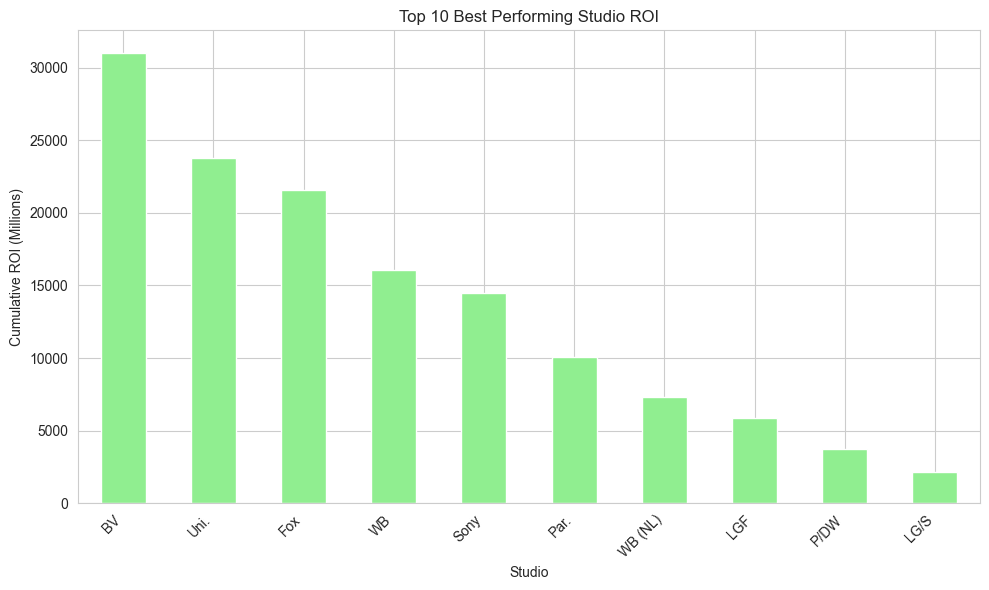

In [181]:
# A bar graph to show the movie studios with the highest cumulative return on investment

# Group the movies by studio and calculate cumulative ROI
studio_roi = merged_movie_df.groupby('studio')['ROI'].sum().sort_values(ascending=False)

# Bar Graph Plot
plt.figure(figsize=(10,6))
(studio_roi.head(10)/1e6).plot(kind='bar', color='lightgreen')  # Dividing by 1e6 to represent in millions
plt.title('Top 10 Best Performing Studio ROI')
plt.xlabel('Studio')
plt.ylabel('Cumulative ROI (Millions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Qn 2
What Genre of movies should Microsoft create in order to capture a niche in the market for maximum return on investment. 

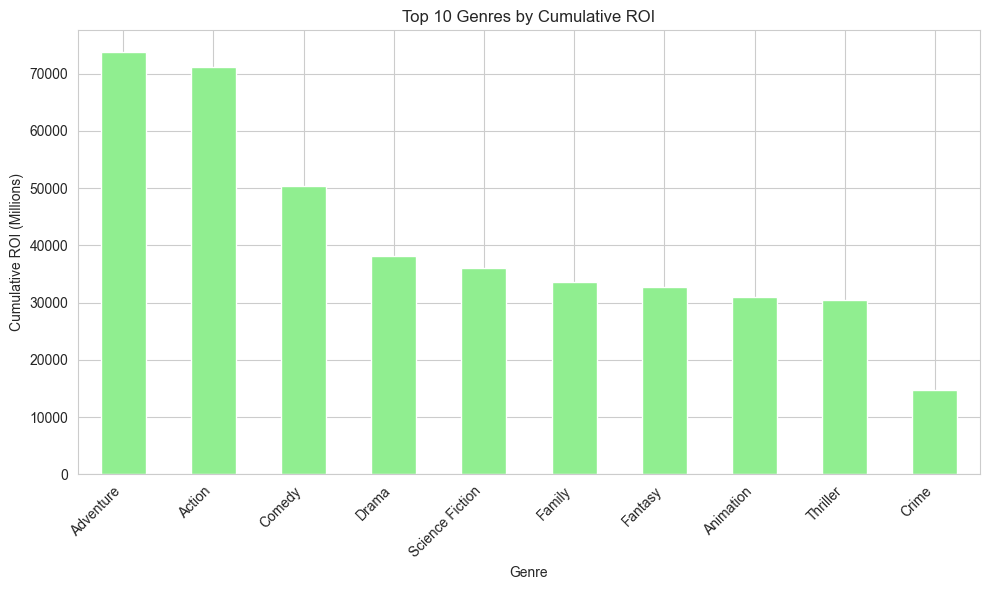

In [186]:

# Explode the genre_names column to have one genre per row
exploded_df = merged_movie_df.explode('genre_names')

# Group by genre and calculate average ROI
genre_roi = exploded_df.groupby('genre_names')['ROI'].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
(genre_roi/1e6).head(10).plot(kind='bar', color='lightgreen')  # Dividing by 1e6 to represent in millions
plt.title('Top 10 Genres by Cumulative ROI')
plt.xlabel('Genre')
plt.ylabel('Cumulative ROI (Millions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Qn 3
On which months of the year should Microsoft release their movies in order to achieve maximum return on investment

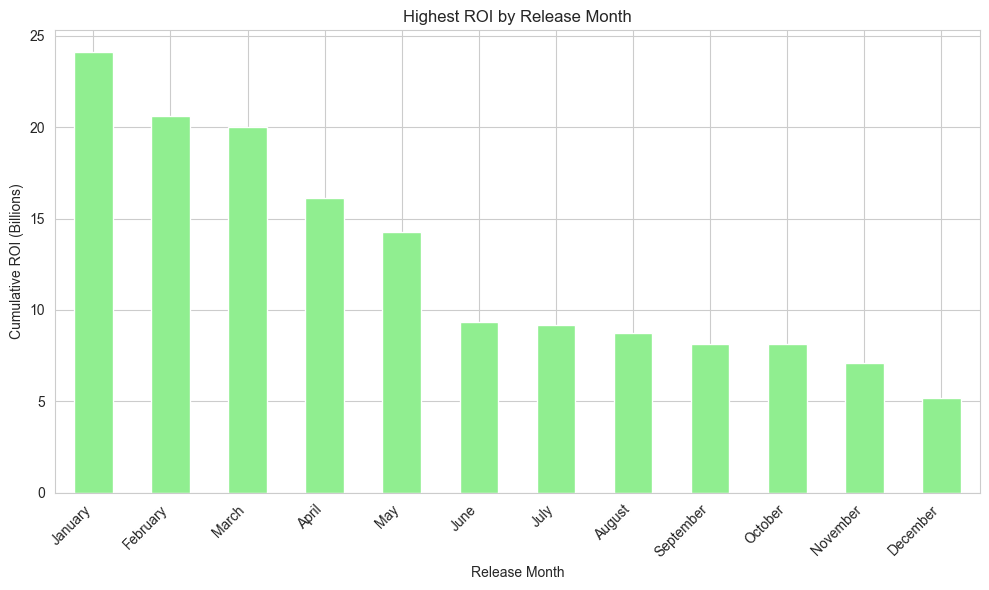

In [185]:
# A bar graph showing the months where movies were released with the highest return on investment.

# Group by release month and calculate average ROI
month_roi = merged_movie_df.groupby('release_month')['ROI'].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
(month_roi/1e9).plot(kind='bar', color='lightgreen')  # Dividing by 1e9 to represent in billions
plt.title('Highest ROI by Release Month')
plt.xlabel('Release Month')
plt.ylabel('Cumulative ROI (Billions)')
plt.xticks(range(0, 12), [calendar.month_name[i] for i in range(1, 13)], rotation=45, ha='right')
, rotation=45, ha='right') 
plt.tight_layout()
plt.show()

# Recommendations

1. Microsoft should patner with movie studios such as Buena Vista, Universal Studios and Fox Studios. By patnering with them , they will be able to gain more traction for their movies.

2. Microsoft should focus on creating movies that are mostly in the Adventure genre, but they can venture into action ,comedy as well, so as to generate maximum return on investments.

3. Microsoft should focus on releasing their movies in the months of January, February and March so as to garner the highest return on investments